# nasdaqdatalink.get_table( )
### example stock price data retrieval

#### part A) Access the data

In [1]:
!pip install nasdaq-data-link

In [2]:
import nasdaqdatalink
import os
from dotenv import load_dotenv

In [3]:
# get a previously issued Quandl key from a .env file
env_file = 'env_vars.env'
load_dotenv(env_file)
nasdaq_key = os.getenv('nasdaqAPIKey')
#print(nasdaq_key)
nasdaqdatalink.ApiConfig.api_key = nasdaq_key

In [18]:
# get stock price data for certain tickers, with a range of dates
data = nasdaqdatalink.get_table('WIKI/PRICES', ticker = ['AAPL', 'MSFT', 'WMT'], 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        #date = { 'gte': '2018-12-31', 'lte': '2019-12-31' }, 
                        paginate=True)
data

,ticker,date,adj_close
None,,,
0,WMT,2018-03-27,86.050000
1,WMT,2018-03-26,87.500000
2,WMT,2018-03-23,85.420000
3,WMT,2018-03-22,87.140000
4,WMT,2018-03-21,88.180000
...,...,...,...
28967,AAPL,1980-12-18,0.391536
28968,AAPL,1980-12-17,0.380362
28969,AAPL,1980-12-16,0.371246


#### part B) Review the data

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28972 entries, 0 to 28971
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ticker     28972 non-null  object        
 1   date       28972 non-null  datetime64[ns]
 2   adj_close  28972 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 679.2+ KB


In [7]:
data.head()

,ticker,date,adj_close
None,,,
0,WMT,2018-03-27,86.05
1,WMT,2018-03-26,87.50
2,WMT,2018-03-23,85.42
3,WMT,2018-03-22,87.14
4,WMT,2018-03-21,88.18


In [8]:
data.tail()

,ticker,date,adj_close
None,,,
28967,AAPL,1980-12-18,0.391536
28968,AAPL,1980-12-17,0.380362
28969,AAPL,1980-12-16,0.371246
28970,AAPL,1980-12-15,0.400652
28971,AAPL,1980-12-12,0.422706


In [9]:
data[data.date == data.date.min()]

,ticker,date,adj_close
None,,,
11495,WMT,1972-08-25,0.043826


In [10]:
data[data.date == data.date.max()]

,ticker,date,adj_close
None,,,
0,WMT,2018-03-27,86.05
11496,MSFT,2018-03-27,89.47
19572,AAPL,2018-03-27,168.34


In [11]:
data[(data.date == data.date.max()) & (data.ticker == 'AAPL')]

,ticker,date,adj_close
None,,,
19572,AAPL,2018-03-27,168.34


#### part C) Transform the data

In [17]:
data_with_index = data.set_index('date')
data_with_index

,ticker,adj_close
date,,
2018-03-27,WMT,86.050000
2018-03-26,WMT,87.500000
2018-03-23,WMT,85.420000
2018-03-22,WMT,87.140000
2018-03-21,WMT,88.180000
...,...,...
1980-12-18,AAPL,0.391536
1980-12-17,AAPL,0.380362
1980-12-16,AAPL,0.371246


In [13]:
# use pandas pivot function to move tickers from 1 row each in their own column
data_pivoted = data_with_index.pivot(columns='ticker')

In [14]:
type(data_pivoted)

pandas.core.frame.DataFrame

In [15]:
# check the tail of the output
data_pivoted.tail()

adj_close              
ticker          AAPL   MSFT    WMT
date                              
2018-03-21   171.270  92.48  88.18
2018-03-22   168.845  89.79  87.14
2018-03-23   164.940  87.18  85.42
2018-03-26   172.770  93.78  87.50
2018-03-27   168.340  89.47  86.05

#### part D) Visualize the data

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

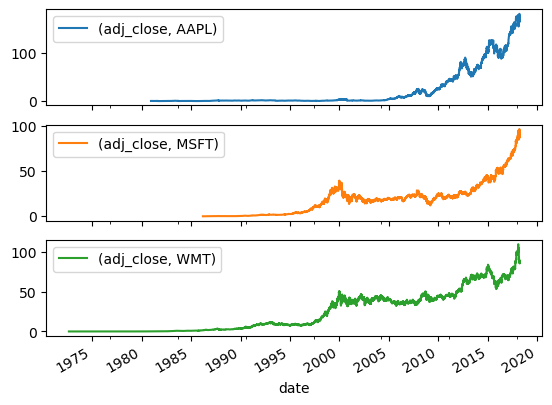

In [16]:
%matplotlib inline
data_pivoted.plot.line(subplots=True)